## Análise Estatística dos Resultados da Pesquisa
O tema: "O Impacto dos Exercícios Físicos na Qualidade do Sono"  
Vamos organizar essa análise em algumas **perguntas básicas** sobre o tema, que podemos responder com base nas respostas do formulário.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("forms_responses_clear.csv")
df.head()

,timestamp,age,exercise_practice,exercise_freq,exercise_cardio,exercise_duration,exercise_period,sleep_duration,sleep_quality,sleep_affects,...,caminhada,ciclismo,corrida,esgrima,esportes coletivos,luta,natação,pilates,treino de força,yoga
0,28/04/2025 21:09:39,21,Não,1,Não,15,Manhã,7,3,"Sim, afeta para melhor",...,1,0,0,0,0,0,0,0,0,0
1,28/04/2025 21:16:31,22,Sim,4,Sim,90,Tarde,6,2,"Sim, afeta para melhor",...,1,0,1,0,0,0,0,1,1,1
2,28/04/2025 21:16:32,23,Não,0,Não,10,Manhã,9,3,"Não, não afeta",...,1,0,0,0,0,0,0,0,0,0
3,28/04/2025 21:18:08,21,Sim,4,Sim,120,Noite,6,4,"Sim, afeta para melhor",...,0,0,0,0,0,0,0,0,1,0
4,28/04/2025 21:18:13,21,Não,0,Não,0,Tarde,6,3,"Não, não afeta",...,1,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['timestamp', 'age', 'exercise_practice', 'exercise_freq',
       'exercise_cardio', 'exercise_duration', 'exercise_period',
       'sleep_duration', 'sleep_quality', 'sleep_affects', 'opinion',
       'recent_exercise_frequency', 'recent_sleep_quality',
       'recent_ext_factors', 'ansiolíticos', 'antidepressivos',
       'antidepressivos ', 'estimulantes ', 'indutores de sono ', 'nenhum',
       'outro ', 'caminhada', 'ciclismo ', 'corrida', 'esgrima',
       'esportes coletivos ', 'luta', 'natação', 'pilates', 'treino de força ',
       'yoga'],
      dtype='object')

### Quem faz exercício físico tem uma média de qualidade de sono maior?

In [35]:
df_exercisexquality = df.groupby('exercise_practice')[["sleep_quality", "recent_exercise_frequency", "recent_sleep_quality"]].agg(['mean'])
df_exercisexquality

,sleep_quality,recent_exercise_frequency,recent_sleep_quality
,mean,mean,mean
exercise_practice,,,
Não,3.333333,1.333333,3.111111
Sim,3.500000,3.071429,3.321429


In [36]:
avg_sleep_yes = df_exercisexquality.loc["Sim", ("sleep_quality", "mean")]
avg_sleep_no = df_exercisexquality.loc["Não", ("sleep_quality", "mean")]
avg_rsleep_yes = df_exercisexquality.loc["Sim", ("recent_sleep_quality", "mean")]
avg_rsleep_no = df_exercisexquality.loc["Não", ("recent_sleep_quality", "mean")]

In [38]:
# comparação da média do sono no geral

dif = avg_sleep_yes - avg_sleep_no
p = (dif/avg_sleep_yes) * 100

print(f"Média de qualidade de sono de quem faz exercício: {avg_sleep_yes}")
print(f"Média de qualidade de sono de quem NÃO faz exercício: {avg_sleep_no}")
print(f"Pessoas que fazem exercício físico têm, em média, um sono melhorado em {dif} pontos ({p.round(2)}%), numa avaliação de 0 a 5")

Média de qualidade de sono de quem faz exercício: 3.5
Média de qualidade de sono de quem NÃO faz exercício: 3.3333333333333335
Pessoas que fazem exercício físico têm, em média, um sono melhorado em 0.16666666666666652 pontos (4.76%), numa avaliação de 0 a 5


In [ ]:
# comparação da média do sono recentemente

dif = avg_rsleep_yes - avg_rsleep_no
p = (dif/avg_rsleep_yes) * 100

print(f"Média de qualidade de sono de quem faz exercício: {avg_rsleep_yes}")
print(f"Média de qualidade de sono de quem NÃO faz exercício: {avg_rsleep_no}")
print(f"Diferença de {dif.round(2)} pontos ({p.round(2)}%)")


Média de qualidade de sono de quem faz exercício: 3.3214285714285716
Média de qualidade de sono de quem NÃO faz exercício: 3.111111111111111
Pessoas que fazem exercício físico tiveram nos últimos 7 dias, em média, o sono melhorado em 0.21031746031746046 pontos (6.33%), numa avaliação de 0 a 5


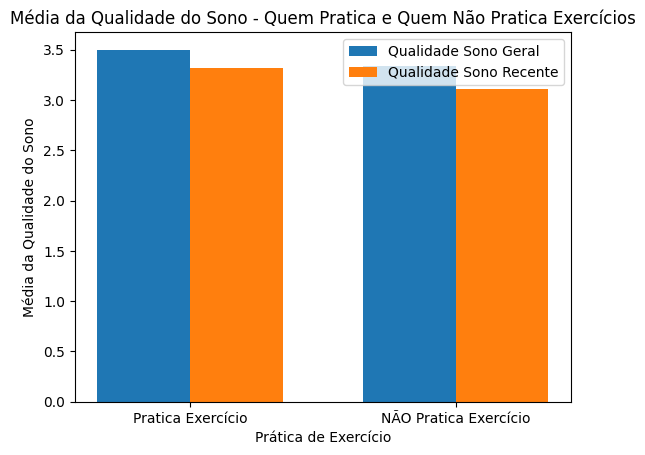

In [29]:
# plotar o gráfico
cat = ["Pratica Exercício", "NÃO Pratica Exercício"]
sleep_avg = [avg_sleep_yes, avg_sleep_no]
rsleep_avg = [avg_rsleep_yes, avg_rsleep_no]
bar_l = 0.35
x = range(len(cat))

fig, ax = plt.subplots()

# Barras
ax.bar(x, sleep_avg, width=bar_l, label='Qualidade Sono Geral')
ax.bar([p + bar_l for p in x], rsleep_avg, width=bar_l, label='Qualidade Sono Recente')

# Eixos e título
ax.set_xlabel('Prática de Exercício')
ax.set_ylabel('Média da Qualidade do Sono')
ax.set_title('Média da Qualidade do Sono - Quem Pratica e Quem Não Pratica Exercícios')
ax.set_xticks([p + bar_l / 2 for p in x])
ax.set_xticklabels(cat)

# Legenda
ax.legend()

plt.show()

/tmp/ipykernel_64180/1419801653.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=['Pratica Exercício', 'Não Pratica Exercício'])


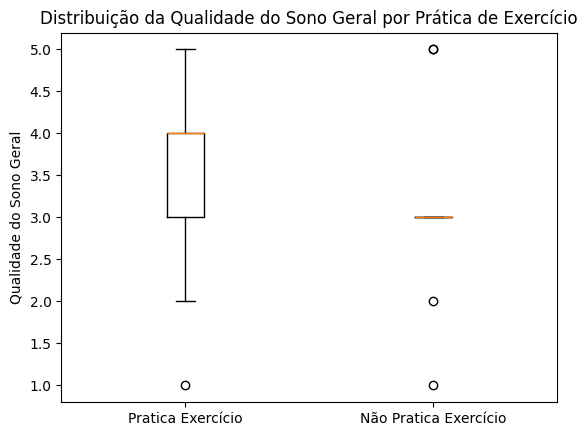

In [30]:
fig, ax = plt.subplots()

data = [
    df_yes['sleep_quality'],
    df_no['recent_sleep_quality']
]

ax.boxplot(data, labels=['Pratica Exercício', 'Não Pratica Exercício'])
ax.set_title('Distribuição da Qualidade do Sono Geral por Prática de Exercício')
ax.set_ylabel('Qualidade do Sono Geral')

plt.show()